# Titanic - Machine Learning from Disaster

Hello, World! It's Kay, again.

I'm currently pursuing the Data Science & ML course from ZTM and I've just completed the Scikit-Learn module.
It's an attempt to see if I have managed to learn anything at all. Hehe!
If I did, then I'm expected to build a better performing model for the competition.

# Getting Data Ready
## Setting up Standard Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
np.random.seed(0)

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pd.plotting.register_matplotlib_converters()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Setting up aesthetics
sns.set_style(style='whitegrid')
sns.set(font_scale=1.2)

## Data Desciption
### Data Dictionary

| Variable |	Definition |	Key |
|---|---|---|
| survival |	Survival |	0 = No, 1 = Yes |
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex |	
| Age |	Age in years |	
| sibsp |	# of siblings / spouses aboard the Titanic |	
| parch |	# of parents / children aboard the Titanic |	
| ticket |	Ticket number |	
| fare |	Passenger fare |	
| cabin |	Cabin number |	
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## Importing Data
### Exploring the Nature of the data

In [3]:
# Importing data
titanic_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Shape and Features
shape = titanic_df.shape
features = titanic_df.columns

print(f"Our data has the following shape {shape}")
print(f"Features present in our data are:",features.to_list(),sep="\n")

Our data has the following shape (891, 12)
Features present in our data are:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Exploring dtypes
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EDA
## Numerical Data

In [8]:
# Performing some light data analysis

# Features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Ticket']

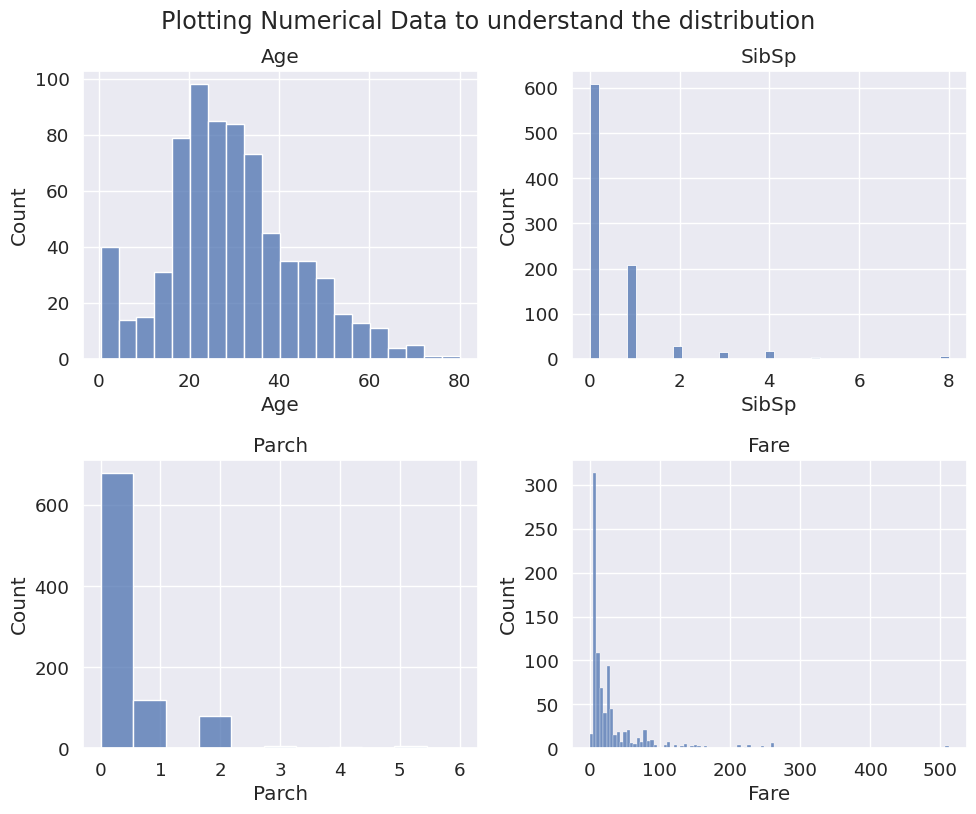

In [9]:
# Plotting Numerical Data 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.histplot(data=titanic_df, x='Age', ax = axes[0,0]).set_title('Age')
sns.histplot(data=titanic_df, x='SibSp', ax = axes[0,1]).set_title('SibSp')
sns.histplot(data=titanic_df, x='Parch', ax = axes[1,0]).set_title('Parch')
sns.histplot(data=titanic_df, x='Fare', ax = axes[1,1]).set_title('Fare')
plt.tight_layout()
plt.suptitle('Plotting Numerical Data to understand the distribution', y=1.02)
plt.show()

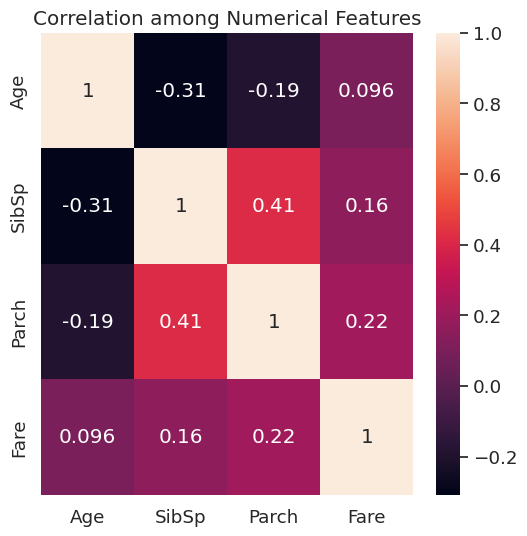

In [10]:
correlation_matrix = titanic_df[numerical_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True).set_title('Correlation among Numerical Features')
plt.show()

In [11]:
# Comparing survival status over Numerical Features 
pivot_table_df = pd.pivot_table(data = titanic_df, index = 'Survived', 
                                values = ['Age','SibSp','Parch','Fare'], 
                                aggfunc='mean').round(2) # Rounding of the cells by 2 digits
pivot_table_df
# Nyah, heatmaps won't work much in this case. :D
# plt.figure(figsize=(8, 2))
# sns.heatmap(pivot_table_df, annot=True, fmt=".2f")
# plt.title("Mean Values Heatmap - Titanic Dataset")
# plt.show()

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.63,22.12,0.33,0.55
1,28.34,48.40,0.46,0.47


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

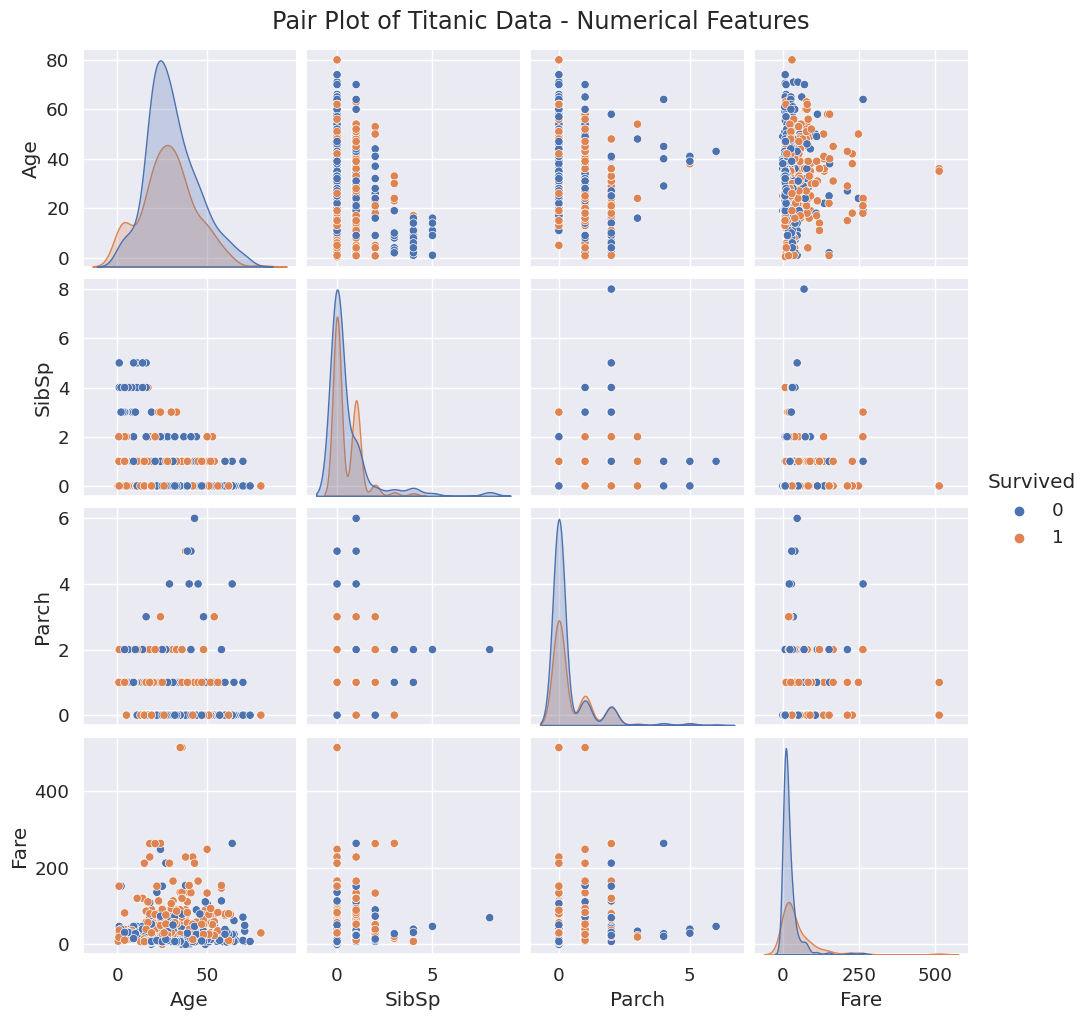

In [12]:
# Pairplotting of Numerical Data to fetch more insight

plt.figure(figsize=(10, 10))  
sns.pairplot(data=titanic_df, vars=numerical_features, kind='scatter', hue='Survived')
plt.suptitle("Pair Plot of Titanic Data - Numerical Features", y=1.02)
# plt.tight_layout(pad=1.2)
plt.show()

## Categorical Data

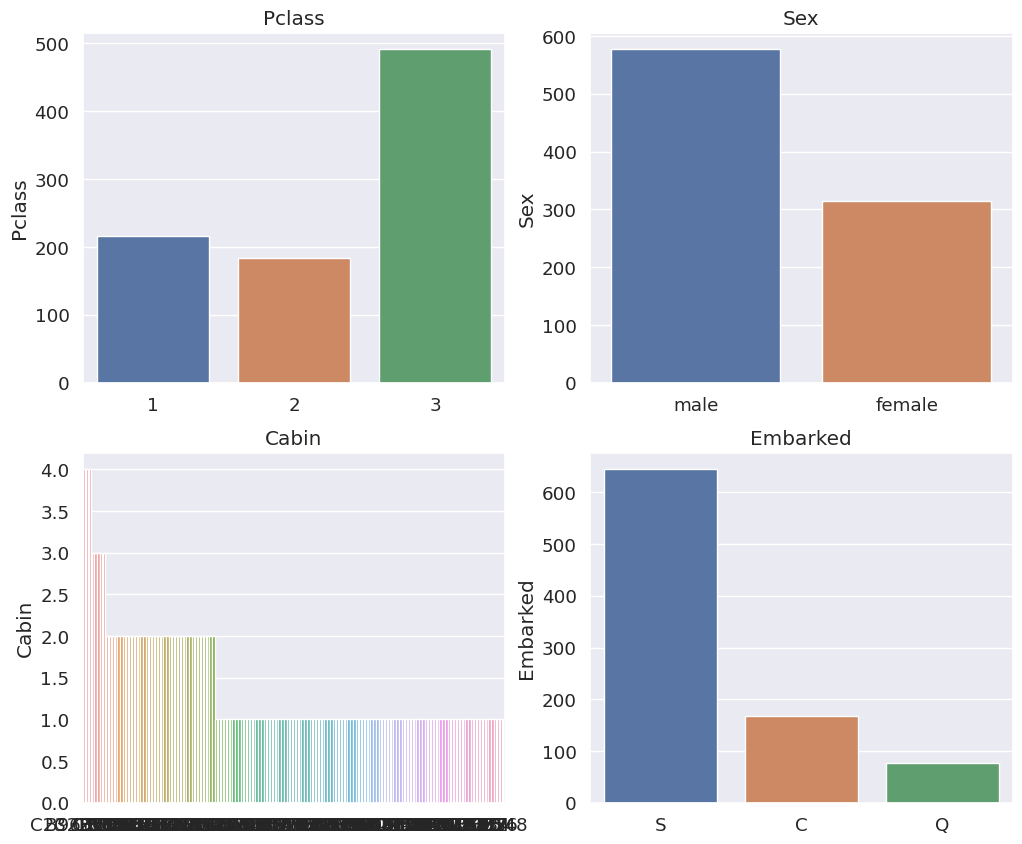

In [13]:
# for feature in categorical_features:
#     sns.barplot(x = titanic_df[feature].value_counts().index, 
#                 y = titanic_df[feature].value_counts()).set_title(feature)
#     plt.show()
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through the categorical features and plot bar plots in separate subplots
for i, feature in enumerate(categorical_features[:4]): # Not selecting Ticket
    row = i // 2
    col = i % 2
    sns.barplot(x=titanic_df[feature].value_counts().index, y=titanic_df[feature].value_counts(), ax=axes[row, col])
    axes[row, col].set_title(feature)


In [14]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


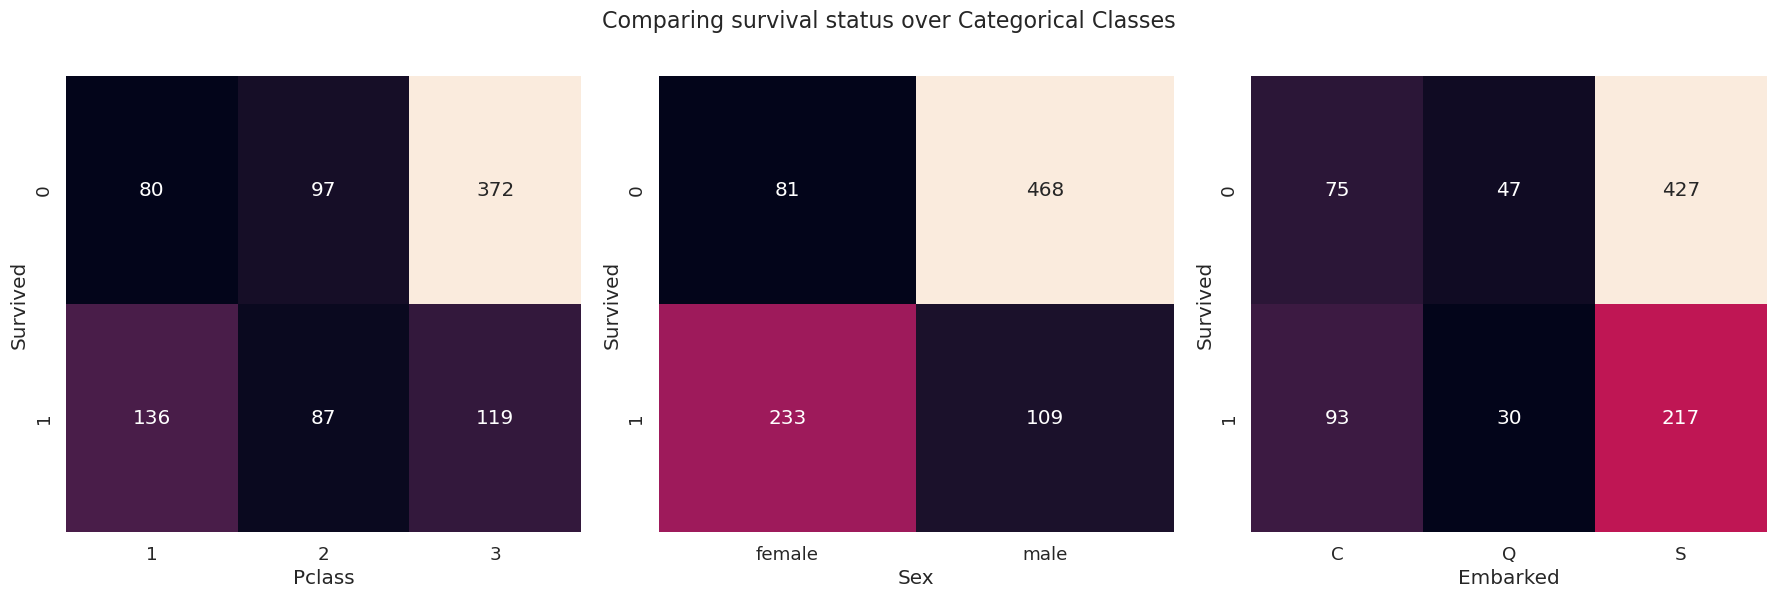

In [15]:
# Comparing survival over Categorical Classes

fig , axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle("Comparing survival status over Categorical Classes", y=1, fontsize=16)

sns.heatmap(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[0], cbar = False,
            annot=True, fmt="")
sns.heatmap(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[1], cbar = False,
            annot=True, fmt="")
sns.heatmap(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[2], cbar = False,
            annot=True, fmt="")
plt.tight_layout()
plt.show()

## Detecting Missing Valus

In [16]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

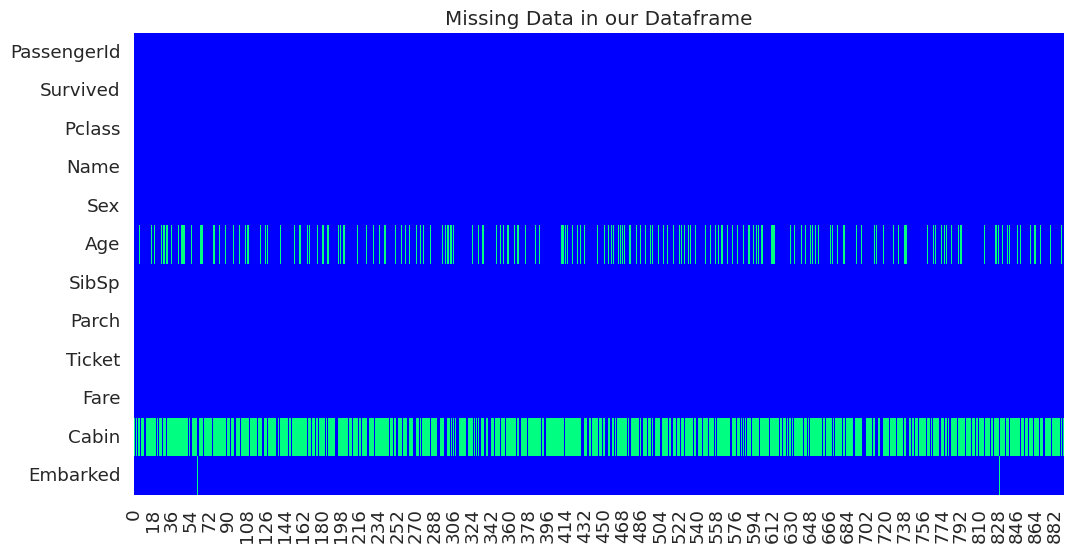

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic_df.isna().transpose() ,cbar = False, cmap = 'winter').set_title('Missing Data in our Dataframe')
plt.show()

## Preprocessing Steps    

   - __Feature Encoding__
       + `Pclass` indicates the social/financial class/status of a person i.e., an ordinal relation between the categories hence I'm preserving the original data (numbers) hence they already have ordinal relation (1, 2, 3).
       + For `Sex` and `Embarked`, there are two (similar) ways of encoding them.
           * `pd.get_dummies(drop_first = True)`, which creates dummy variable following by dropping the firt category.
           * `OneHotEncoder(sparse=False)`, which does a binary encoding and returns a dense matrix. (similar)
   
   
   - __Handling Missing Values__
       + Almost 75% entries under the `Cabin` feature are blank so I'm dropping it. (Should I handle it in a different way next time?)
       + `Age` is fairly close to normal distribution and contains 18% of blank entries so It can be `imputed` by `mean` strategy.
       + `Embarked` has only two null values and has some `class imbalance` as `S` is high in number.
       + We can either 
           - [x] Drop those two records, or, 
           - [ ] Fill them with `mode` i.e., `S`      
   
   
   - __Feature Elimination__
       + Dropping `Name` and `PassengerId` as they do not seem to be of much relevance (read, 'Importance'). (Am I right about that?!)
       + Dropping `Cabin`

In [18]:
# New set of categorical features
categorical_features_2 = ['Pclass', 'Sex', 'Embarked']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc

# Setting up transformers 
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Creating Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer, numerical_features),
    ('categorical_transformer', categorical_transformer, categorical_features_2[1:]),
    
])

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

base_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('rfc', rfc),
])

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [21]:
%%time

# Selecting X & y
X = titanic_df[numerical_features+categorical_features_2]
y = titanic_df.Survived

# Three set spliting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Base
base_pipeline.fit(X_train, y_train)
base_pipeline.score(X_test, y_test)

CPU times: user 338 ms, sys: 52.9 ms, total: 391 ms
Wall time: 348 ms


0.8044692737430168

In [22]:
cv_scores = cross_val_score(base_pipeline, X_train, y_train, cv=10)
cv_scores.mean()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.7977503912363069

In [23]:
%%time

from sklearn.model_selection import RandomizedSearchCV

pipe_grid = {
    "preprocessor__numerical_transformer__strategy":["median"],
    'rfc__ccp_alpha': [0, 0.1, 0.01],
#     'rfc__class_weight': None,
    'rfc__criterion': ['entropy'],
    'rfc__max_depth': [None, 5],
    'rfc__max_features': [None,'sqrt'],
    'rfc__max_leaf_nodes': [None, 2, 6, 8],
    'rfc__max_samples': [None, 6, 8],
#     'rfc__min_impurity_decrease': 0.0,
    'rfc__min_samples_leaf': [2, 6,8],
    'rfc__min_samples_split': [1, 2, 3],
#     'rfc__min_weight_fraction_leaf': 0.0,
    'rfc__n_estimators': np.arange(50,2000,100),
#     'rfc__oob_score': False,
}

# Grid Search in Pipeline
pipe_grid = RandomizedSearchCV(
                estimator = base_pipeline, 
                param_distributions = pipe_grid, 
                cv = 10,
                n_iter = 100,
                verbose = True)
pipe_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
390 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-pa

CPU times: user 8min 22s, sys: 24.1 s, total: 8min 46s
Wall time: 12min 53s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numerical_transformer',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['Age',
                                                                                'SibSp',
                                                                                'Parch',
                                                                                'Fare']),
                                                                              ('categorical_transformer',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Sex',
                                                                                'Embarked'])])),
                                             ('rfc',
                                              RandomForestClassifier(n_jobs=-1...
                                        'rfc__criterion': ['entropy'],
                                        'rfc__max_depth': [None, 5],
                                        'rfc__max_features': [None, 'sqrt'],
                                        'rfc__max_leaf_nodes': [None, 2, 6, 8],
                                        'rfc__max_samples': [None, 6, 8],
                                        'rfc__min_samples_leaf': [2, 6, 8],
                                        'rfc__min_samples_split': [1, 2, 3],
                                        'rfc__n_estimators': array([  50,  150,  250,  350,  450,  550,  650,  750,  850,  950, 1050,
       1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950])},
                   verbose=True)

In [24]:
pipe_grid.best_score_

0.8203247261345853

In [25]:
pipe_grid.best_params_

{'rfc__n_estimators': 50,
 'rfc__min_samples_split': 3,
 'rfc__min_samples_leaf': 2,
 'rfc__max_samples': None,
 'rfc__max_leaf_nodes': None,
 'rfc__max_features': 'sqrt',
 'rfc__max_depth': None,
 'rfc__criterion': 'entropy',
 'rfc__ccp_alpha': 0.01,
 'preprocessor__numerical_transformer__strategy': 'median'}

In [26]:
%%time

from sklearn.model_selection import GridSearchCV

pipe_grid_1 = {'rfc__n_estimators': np.arange(1900, 3000, 100),
             'rfc__min_samples_split': [2, 4],
             'rfc__min_samples_leaf': [6, 10],
             'rfc__max_samples': [None],
             'rfc__max_leaf_nodes': [8],
             'rfc__max_features': [None],
             'rfc__max_depth': [None],
             'rfc__criterion': ['entropy'],
             'rfc__ccp_alpha': [0],
             'preprocessor__numerical_transformer__strategy': ['median']}

# Grid Search in Pipeline
pipe_grid_1 = GridSearchCV(
                estimator = base_pipeline, 
                param_grid = pipe_grid_1, 
                cv = 5,
                verbose = True)

pipe_grid_1.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

CPU times: user 7min 10s, sys: 25.7 s, total: 7min 35s
Wall time: 12min 6s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_transformer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categorical_transformer',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random...
             param_grid={'preprocessor__numerical_transformer__strategy': ['median'],
                         'rfc__ccp_alpha': [0], 'rfc__criterion': ['entropy'],
                         'rfc__max_depth': [None], 'rfc__max_features': [None],
                         'rfc__max_leaf_nodes': [8], 'rfc__max_samples': [None],
                         'rfc__min_samples_leaf': [6, 10],
                         'rfc__min_samples_split': [2, 4],
                         'rfc__n_estimators': array([1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900])},
             verbose=True)

In [27]:
pipe_grid_1.best_score_

0.8103910174332711

In [28]:
pipe_grid_1.best_params_

{'preprocessor__numerical_transformer__strategy': 'median',
 'rfc__ccp_alpha': 0,
 'rfc__criterion': 'entropy',
 'rfc__max_depth': None,
 'rfc__max_features': None,
 'rfc__max_leaf_nodes': 8,
 'rfc__max_samples': None,
 'rfc__min_samples_leaf': 6,
 'rfc__min_samples_split': 2,
 'rfc__n_estimators': 1900}

In [29]:
# base_pipeline = Pipeline(steps = [
#     ('preprocessor', preprocessor),
#     ('rfc', rfc),
# ])

In [30]:
rfc_optimised = RandomForestClassifier(
    n_estimators = 1900,
    min_samples_split = 2,
    min_samples_leaf = 6,
    max_leaf_nodes = 8,
    criterion = 'entropy',
    n_jobs = -1)

final_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('rfc_optimised', rfc_optimised),
])

final_pipeline.fit(X, y)
predictions = final_pipeline.predict(test_df)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
